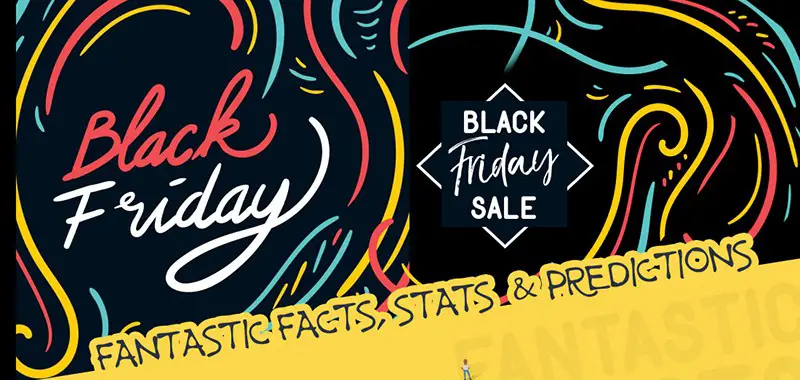


### About the Dataset:

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.


#### Problem: Predict purchase amount.

### Data Overview:

Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

+ User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
+ Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
+ Gender: indicates the gender of the person making the transaction.
+ Age: indicates the age group of the person making the transaction.
+ Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
+ City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
+ Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
+ Marital_Status: is 0 if the user is not married and 1 otherwise.
+ Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
+ Purchase: Purchase amount.

In [1]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the Datasetshape

train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df= train.copy()
# merging train & test datasets
# for ease of use, storing train data in df


In [3]:
# lets check the size of the Dataset
train.shape, test.shape, (train.shape[0]/(train.shape[0] + test.shape[0]))

((550068, 12), (233599, 11), 0.7019154819585359)

**The training Dataset has:**
+ 550,068 rows
+ 12 columns
+ Data split is 70% training 


**The test Dataset has:**
+ 233599 rows
+ 11 columns (target column 'Purchase' is dropped)
+ Data split is 30% testing


*Since, we dont have Target column values in test dataset, we can't use test set for accuracy score.*


*So, training set becomes the main set, which will be further split into 70-30 for train-test.*

In [4]:
# checking the info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# Understandign all the columns

cols = df.columns

for i in cols:
    print(i)
    print(df[i].unique)
    print(df[i].nunique())
    print('-'*50)

User_ID


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


**Observations:**

1. Most Selling Product is @Product_ID: P00265242
2. Maximum no. of transctions are made by Gender: **Male**
3. Maximum purchase is done by customers in Age group **26-35 years**
4. Maximum purhcase is done by City_Category **B**, and by residents resisiding in in currenc tcity for more than **1 years.**

In [7]:
# checking for null values by percentage

m_val =df.isna().sum()
m_val_per= df.isna().sum()/len(df)*100

miss= {'missing values': m_val,
       'missing values in percent' : m_val_per}

miss= pd.DataFrame(miss)
miss

,missing values,missing values in percent
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


1. 70% data is missing in feature: Product_Category_3, so we will the drop the column
2. User_ID & Product_ID columns can be dropped as they add no vlaue to our Analysis
3. Clearly all features are categorical, there are no numerical features except the **Target column: 'Purchase'**

In [8]:
# dropping unnecessary columns

df.drop(['User_ID','Product_ID','Product_Category_3'], axis = 1, inplace = True)

In [9]:
#checking the new head()

df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


In [10]:
# fixing Product_category_2 (categorical) column with MODE value

df.Product_Category_2.fillna(df.Product_Category_2.mode()[0], inplace = True)

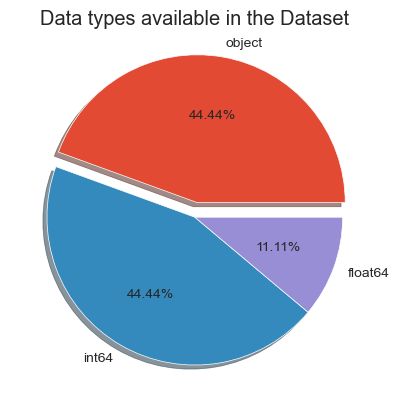

In [11]:
# lets check the Data distribution across various datatypes

df.dtypes.value_counts().plot.pie(autopct ='%1.2f%%', explode = [0.1,0,0], shadow= True)
plt.title('Data types available in the Dataset')
plt.ylabel('')
plt.show()

In [12]:
# Fixing Data types of categorical features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


In [13]:
df.Occupation= df.Occupation.astype('object')
df.Marital_Status= df.Marital_Status.astype('object')
df.Product_Category_1= df.Product_Category_1.astype('object')
df.Product_Category_2= df.Product_Category_2.astype('object')

# Starting EDA

## 1. Univariate analysis

### A) Gender

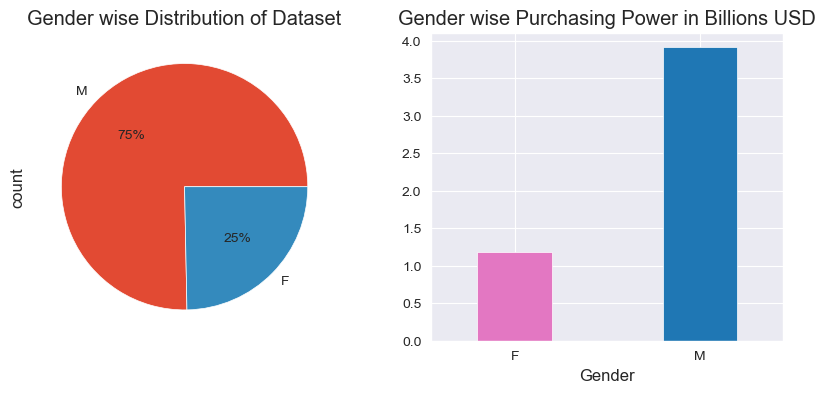

In [14]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
df.Gender.value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Gender wise Distribution of Dataset')

plt.subplot(1,2,2)
(df.Purchase.groupby(df.Gender).sum()/1000000000).plot(kind ='bar', width =0.4, color =['tab:pink', 'tab:blue'])
plt.title('Gender wise Purchasing Power in Billions USD')
plt.xticks(rotation =360)
plt.show()



In [15]:
print('Data Distribution by Gender in %age:')
print(round(df.Gender.value_counts(normalize = True)* 100),2)
print('\n')
print('Purhase done by Gender in Billions USD:')
print(round(df.Purchase.groupby(df.Gender).sum()/1000000000,2))

Data Distribution by Gender in %age:
Gender
M    75.0
F    25.0
Name: proportion, dtype: float64 2


Purhase done by Gender in Billions USD:
Gender
F    1.19
M    3.91
Name: Purchase, dtype: float64


In [16]:
3.91/1.19

3.285714285714286

**Observations:**

1. The Dataset is divided by Gender in 3: 1 Male: Female ratio
2. Purchase power of Male (3.91 B USD) is almost 3 times more than that of Female (1.19 B USD)


### B) Age

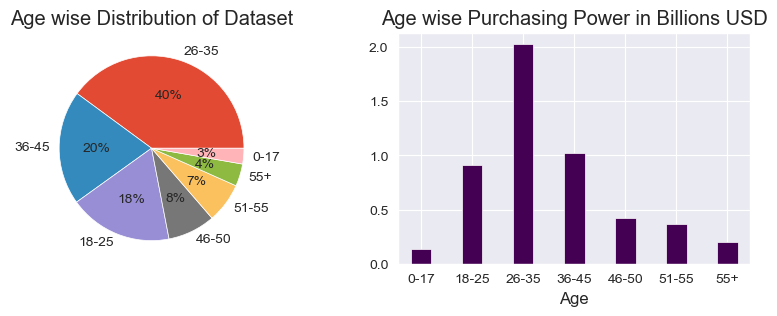

In [17]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
df.Age.value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Age wise Distribution of Dataset')
plt.ylabel('')

plt.subplot(1,2,2)
(df.Purchase.groupby(df.Age).sum()/1000000000).plot(kind ='bar', width =0.4, colormap = 'viridis')
plt.title('Age wise Purchasing Power in Billions USD')
plt.xticks(rotation =360)
plt.show()

In [18]:
df.Purchase.groupby(df.Age).sum().sort_values(ascending = False)

Age
26-35    2031770578
36-45    1026569884
18-25     913848675
46-50     420843403
51-55     367099644
55+       200767375
0-17      134913183
Name: Purchase, dtype: int64

**Observations:**

1. The Dataset is divided into 7 age groups
2. Maximum Purchase power is of the Age group 26-35 years ($ 2.03B)

3. Minimum Purchase power is of the Age group 0-17 years ($ 0.13B)

### C) Occupation

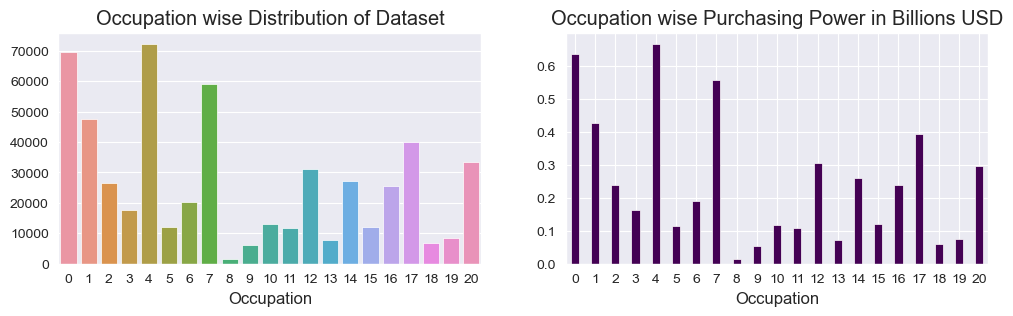

In [19]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.countplot(x= df.Occupation)
plt.title('Occupation wise Distribution of Dataset')
plt.ylabel('')

plt.subplot(1,2,2)
(df.Purchase.groupby(df.Occupation).sum()/1000000000).plot(kind ='bar', width =0.4, colormap = 'viridis')
plt.title('Occupation wise Purchasing Power in Billions USD')
plt.xticks(rotation =360)
plt.show()

In [20]:
df.Purchase.groupby(df.Occupation).sum().sort_values(ascending = False).head(5)

Occupation
4     666244484
0     635406958
7     557371587
1     424614144
17    393281453
Name: Purchase, dtype: int64

**Observations:**

1. The Dataset is divided into 21 Occupation Categories
2. Top 5 Maximum Spending Occupation Categories are : 

        1. 4 (0.66 B USD)
        2. 0 (0.63 B USD)
        3. 7 (0.55 B USD)
        4. 1 (0.42 B USD)
        5. 17 (0.39 B USD)

### D) City Category

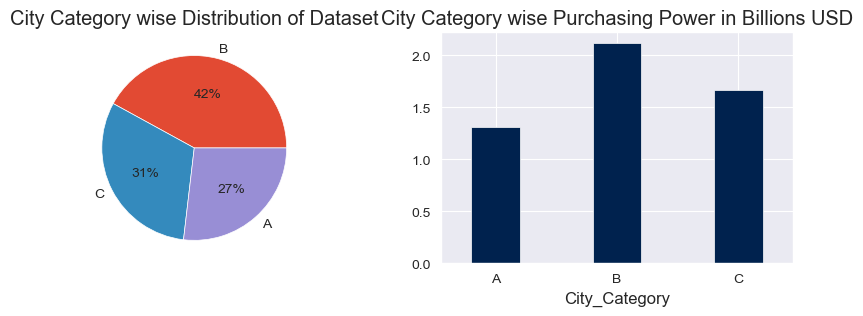

In [21]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
df.City_Category.value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('City Category wise Distribution of Dataset')
plt.ylabel('')

plt.subplot(1,2,2)
(df.Purchase.groupby(df.City_Category).sum()/1000000000).plot(kind ='bar', width =0.4, colormap = 'cividis')
plt.title('City Category wise Purchasing Power in Billions USD')
plt.xticks(rotation =360)
plt.show()

In [22]:
round(df.Purchase.groupby(df.City_Category).sum()/1000000000,2).sort_values(ascending = False)

City_Category
B    2.12
C    1.66
A    1.32
Name: Purchase, dtype: float64

**Observations:**

1. The Dataset is divided into 3 City Categories
2. Purchase recorded from each City Category is as follows: 

       + B (2.12 B USD)
       + C (1,66 B USD)
       + A (1.32 B USD)

### D) Stay_In_Current_City_Years

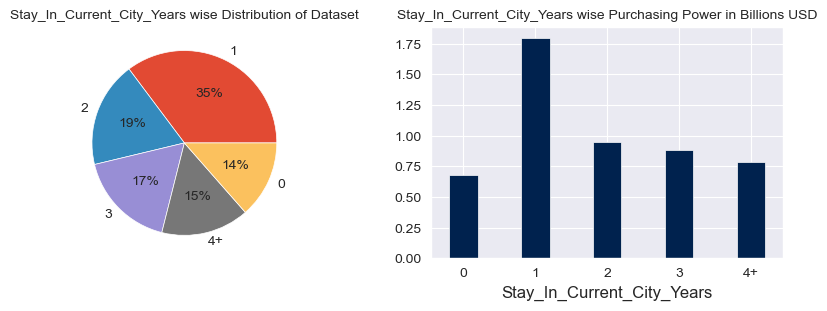

In [23]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
df.Stay_In_Current_City_Years.value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Stay_In_Current_City_Years wise Distribution of Dataset', fontdict= {'fontsize' : 10})
plt.ylabel('')

plt.subplot(1,2,2)
(df.Purchase.groupby(df.Stay_In_Current_City_Years).sum()/1000000000).plot(kind ='bar', width =0.4, colormap = 'cividis')
plt.title('Stay_In_Current_City_Years wise Purchasing Power in Billions USD', fontdict= {'fontsize' : 10})
plt.xticks(rotation =360)
plt.show()

In [24]:
round(df.Purchase.groupby(df.Stay_In_Current_City_Years).sum()/1000000000,2).sort_values(ascending = False)

Stay_In_Current_City_Years
1     1.79
2     0.95
3     0.88
4+    0.79
0     0.68
Name: Purchase, dtype: float64

**Observations:**

1. The Dataset is divided into 5 sub-categories based on Stay_In_Current_City_Years
2. Maximum Purchase is recorded from customers staying in their current City for 1 year
3. Minimum Purchase is recorded from customers who have just arrived in their current city (0 years) 


### E) Marital_Status

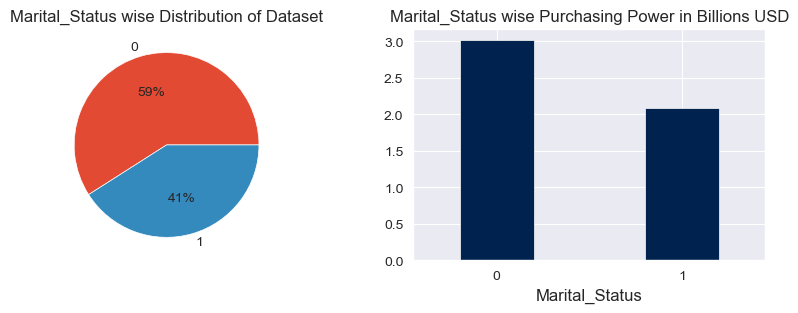

In [25]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
df.Marital_Status.value_counts().plot.pie(autopct = '%1.0f%%')
plt.title('Marital_Status wise Distribution of Dataset', fontdict= {'fontsize' : 12})
plt.ylabel('')

plt.subplot(1,2,2)
(df.Purchase.groupby(df.Marital_Status).sum()/1000000000).plot(kind ='bar', width =0.4, colormap = 'cividis')
plt.title('Marital_Status wise Purchasing Power in Billions USD', fontdict= {'fontsize' : 12})
plt.xticks(rotation =360)
plt.show()

In [26]:
round(df.Purchase.groupby(df.Marital_Status).sum()/1000000000,2).sort_values(ascending = False)

Marital_Status
0    3.01
1    2.09
Name: Purchase, dtype: float64

**Observations:**

1. The Dataset is divided into 2 sub-categories based on marital status
2. 41% customers are married  while 59% customers are Un-married
2. Un-married customers show a higher purchasing power than Married customers.

### G) Product_Category_1

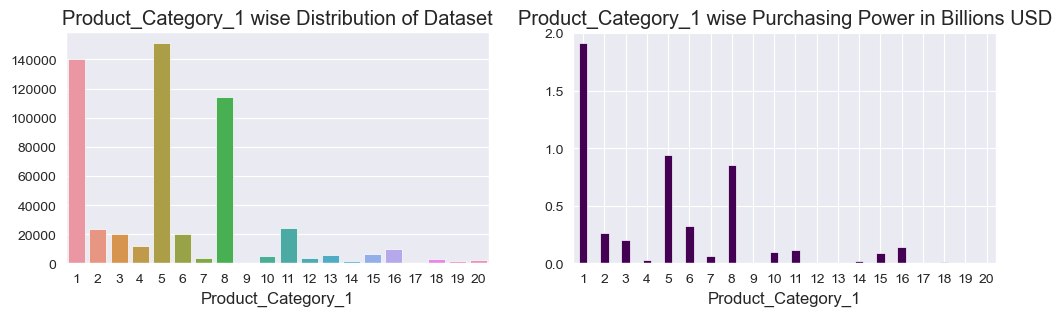

In [27]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.countplot(x= df.Product_Category_1)
plt.title('Product_Category_1 wise Distribution of Dataset')
plt.ylabel('')

plt.subplot(1,2,2)
(df.Purchase.groupby(df.Product_Category_1).sum()/1000000000).plot(kind ='bar', width =0.4, colormap = 'viridis')
plt.title('Product_Category_1 wise Purchasing Power in Billions USD')
plt.xticks(rotation =360)
plt.show()

In [28]:
round(df.Purchase.groupby(df.Product_Category_1).sum()/1000000000,2).sort_values(ascending = False)

Product_Category_1
1     1.91
5     0.94
8     0.85
6     0.32
2     0.27
3     0.20
16    0.15
11    0.11
10    0.10
15    0.09
7     0.06
4     0.03
14    0.02
9     0.01
12    0.01
17    0.01
18    0.01
13    0.00
19    0.00
20    0.00
Name: Purchase, dtype: float64

**Observations:**

1. The Dataset is divided into 20 sub-categories based on Product_Category_1
2. Sub-category no.1 is the highest grossing product under Product_Category_1

### H) Product_Category_2

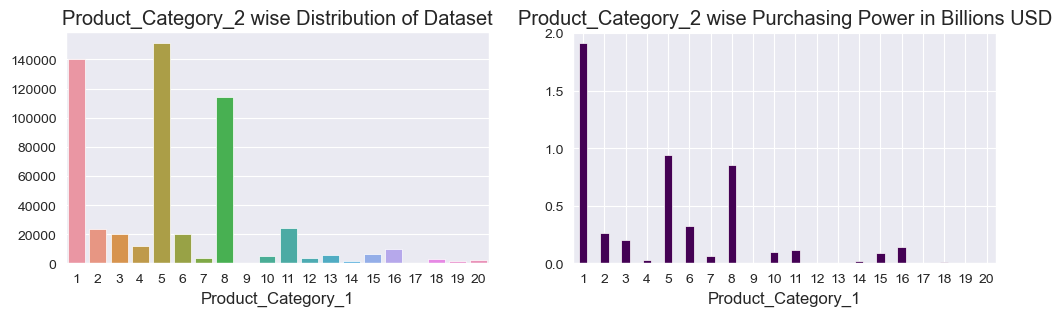

In [29]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.countplot(x= df.Product_Category_1)
plt.title('Product_Category_2 wise Distribution of Dataset')
plt.ylabel('')

plt.subplot(1,2,2)
(df.Purchase.groupby(df.Product_Category_1).sum()/1000000000).plot(kind ='bar', width =0.4, colormap = 'viridis')
plt.title('Product_Category_2 wise Purchasing Power in Billions USD')
plt.xticks(rotation =360)
plt.show()

In [30]:
round(df.Purchase.groupby(df.Product_Category_2).sum()/1000000000,2).sort_values(ascending = False)

Product_Category_2
8.0     1.96
2.0     0.67
16.0    0.45
15.0    0.39
14.0    0.39
4.0     0.26
5.0     0.24
6.0     0.19
17.0    0.13
11.0    0.13
13.0    0.10
10.0    0.05
12.0    0.04
9.0     0.04
3.0     0.03
18.0    0.03
7.0     0.00
Name: Purchase, dtype: float64

**Observations:**

1. The Dataset is divided into 20 sub-categories based on Product_Category_2
2. Sub-category no.8 is the highest grossing product under Product_Category_2

### I) Target Column: Purchase

In [31]:
# Sum of all Purchase values in the Dataset

np.sum(df.Purchase)

5095812742

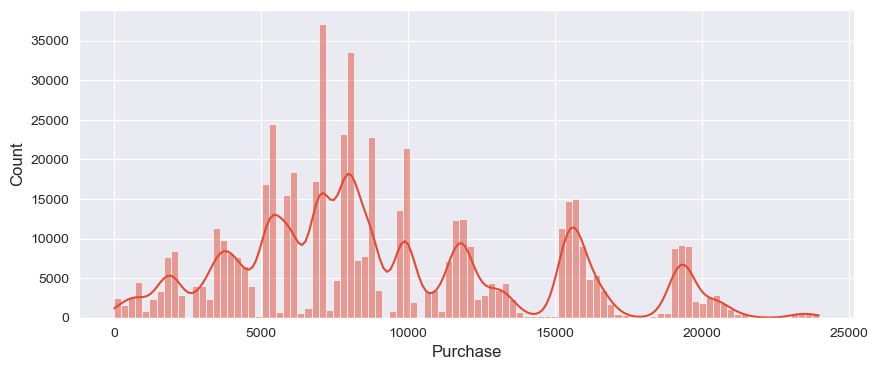

In [32]:
plt.figure(figsize =(10,4))
sns.histplot(x=df.Purchase, kde = True, bins = 100,common_norm=True )
plt.show()

**Observations:**

1. The Total Purchase value of all transcations sums up to $ 5.09 B

## 2. Bivariate analysis

## Q. Analyse the customer base and find the Gender distirbution across Age groups?

In [33]:
# Analysing Male gender population Distribution
M= df[df.Gender == 'M'].groupby(df.Age)['Gender'].count()
M, M.shape

(Age
 0-17      10019
 18-25     75032
 26-35    168835
 36-45     82843
 46-50     32502
 51-55     28607
 55+       16421
 Name: Gender, dtype: int64,
 (7,))

In [34]:
# Analysing Female gender population Distribution
F= df[df.Gender == 'F'].groupby(df.Age)['Gender'].count()
F, F.shape

(Age
 0-17      5083
 18-25    24628
 26-35    50752
 36-45    27170
 46-50    13199
 51-55     9894
 55+       5083
 Name: Gender, dtype: int64,
 (7,))

In [35]:
# Data table of Distirbution
data = {'Male':M, 'Female':F}
data=pd.DataFrame(data)
data['Total']= data.Male+ data.Female
data= data.reset_index()
data

,Age,Male,Female,Total
0,0-17,10019,5083,15102
1,18-25,75032,24628,99660
2,26-35,168835,50752,219587
3,36-45,82843,27170,110013
4,46-50,32502,13199,45701
5,51-55,28607,9894,38501
6,55+,16421,5083,21504


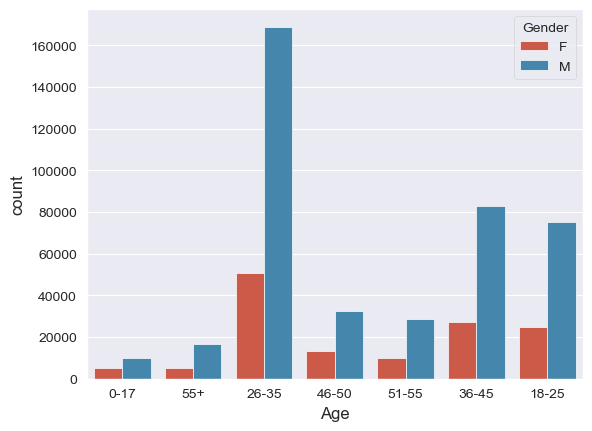

In [36]:
# Bar plot of Distirbution
sns.countplot(x='Age', hue = 'Gender', data =df)
plt.show()


## Q. Analyse the customer base and find the distirbution across Age groups along with Marital Status?

<Axes: xlabel='Age', ylabel='count'>

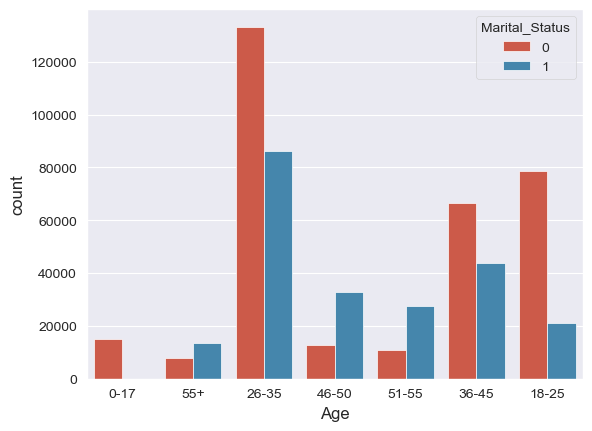

In [37]:
sns.countplot(x= 'Age', hue ='Marital_Status', data =df)

In [38]:
#Data table
M= df[df.Marital_Status == 1].groupby(df.Age)['Marital_Status'].count()
M, M.shape


(Age
 18-25    21116
 26-35    86291
 36-45    43636
 46-50    33011
 51-55    27662
 55+      13621
 Name: Marital_Status, dtype: int64,
 (6,))

In [39]:
U= df[df.Marital_Status == 0].groupby(df.Age)['Marital_Status'].count()
U, U.shape

(Age
 0-17      15102
 18-25     78544
 26-35    133296
 36-45     66377
 46-50     12690
 51-55     10839
 55+        7883
 Name: Marital_Status, dtype: int64,
 (7,))

In [40]:
data = {'Married': M, 'Un_Married': U}
data =pd.DataFrame(data).reset_index()
data

,Age,Married,Un_Married
0,0-17,NaN,15102
1,18-25,21116.0,78544
2,26-35,86291.0,133296
3,36-45,43636.0,66377
4,46-50,33011.0,12690
5,51-55,27662.0,10839
6,55+,13621.0,7883


## Q. We know that City Category B gives maximum Sales, find its top Selling Product under each Categories?

In [41]:
df[df.City_Category == 'B'].Purchase.groupby(df.Product_Category_1).sum().sort_values(ascending = False)

Product_Category_1
1     782682980
5     395641152
8     354497531
6     134293052
2     116282478
3      85853449
16     58891854
11     48359709
10     40460490
15     38474141
7      26151755
4      12020080
14      8211405
18      4110282
9       2730155
17      2721070
12      2226915
13      1621116
20       286425
19        17566
Name: Purchase, dtype: int64

In [42]:
df[df.City_Category == 'B'].Purchase.groupby(df.Product_Category_2).sum().sort_values(ascending = False)

Product_Category_2
8.0     822992510
2.0     271307154
16.0    183494474
14.0    162981220
15.0    159269054
4.0     113471961
5.0      99150555
6.0      77748920
17.0     52492275
11.0     52366534
13.0     40865349
10.0     18859842
9.0      17836517
12.0     17095966
3.0      13098531
18.0     10701853
7.0       1800890
Name: Purchase, dtype: int64

**Answer:**

Similar to our observation for the entire Dataset, the highest grossing products in City Category B are:

1. Sub-Category 1 under Product_Category_1 (0.782 B USD)
2. Sub-Category 8 under Product_Category_2 (0.822 B USD)

## Label Encoding Categorical features

In [43]:
# Separating our x and y
x= df.drop('Purchase', axis =  1).copy()
y= df.Purchase.copy()

In [44]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# since all columns are Categrical 

cols = x.columns

for i in cols:
    x[i] =le.fit_transform(x[i])

In [45]:
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,2,6
1,0,0,10,0,2,0,0,4
2,0,0,10,0,2,0,11,6
3,0,0,10,0,2,0,11,12
4,1,6,16,2,4,0,7,6


## Scaling using MinMax Scaler

In [46]:
# Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

x = sc.fit_transform(x)

In [47]:
x

array([[-1.74651251, -1.84424754,  0.29486356, ..., -0.83301799,
        -0.61080871, -0.29360542],
       [-1.74651251, -1.84424754,  0.29486356, ..., -0.83301799,
        -1.11891197, -0.75936196],
       [-1.74651251, -1.84424754,  0.29486356, ..., -0.83301799,
         1.67565594, -0.29360542],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ...,  1.20045427,
         3.70806897, -0.29360542],
       [-1.74651251,  2.58827703, -1.08494277, ..., -0.83301799,
         3.70806897, -0.29360542],
       [-1.74651251,  1.11076884, -1.23825458, ...,  1.20045427,
         3.70806897, -0.29360542]])

# Splitting the Dataset

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state =0)

In [49]:
x_train.shape, x_test.shape

((385047, 8), (165021, 8))

In [50]:
y_train.shape, y_test.shape

((385047,), (165021,))

## Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [52]:
y_predict = model.predict(x_test)

In [53]:
y_predict

array([11541.84704597,  6519.15383561,  9511.10917727, ...,
       10513.17224047, 11192.71962182,  9915.21867523])

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'r2 score {r2_score(y_test, y_predict)}')
print(f'MAE {mean_absolute_error(y_test, y_predict)}')
print(f'MSE {mean_squared_error(y_test, y_predict)}')
print(f'Training Accuracy {model.score(x_train, y_train)}')

r2 score 0.12473037228469874
MAE 3604.318213691425
MSE 22138945.394229956
Training Accuracy 0.12600969863450806


## GradientBoosting Model

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [56]:
y_predict = model.predict(x_test)

In [57]:
print(f'r2 score {r2_score(y_test, y_predict)}')
print(f'MAE {mean_absolute_error(y_test, y_predict)}')
print(f'MSE {mean_squared_error(y_test, y_predict)}')
print(f'Training Accuracy {model.score(x_train, y_train)}')

r2 score 0.6445530167712802
MAE 2274.3038748644285
MSE 8990625.406236555
Training Accuracy 0.643252900529907


### KNeighborsRegressor()

In [58]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train, y_train)

KNeighborsRegressor()

In [59]:
y_predict = model.predict(x_test)

In [60]:
print(f'r2 score {r2_score(y_test, y_predict)}')
print(f'MAE {mean_absolute_error(y_test, y_predict)}')
print(f'MSE {mean_squared_error(y_test, y_predict)}')
print(f'Training Accuracy {model.score(x_train, y_train)}')

r2 score 0.5319840364187908
MAE 2491.6745880827284
MSE 11837929.17434872
Training Accuracy 0.6320695056742451


# Conclusion:

1. The training Dataset has:

+ 550,068 rows
+ 12 columns
+ Data split is 70% training

2. The test Dataset has:

+ 233599 rows
+ 11 columns (target column 'Purchase' is dropped)
+ Data split is 30% testing

**Since, we dont have Target column values in test dataset, we can't use test set for accuracy score.**

**So, training set becomes the main set, which will be further split into 70-30 for train-test.**



2. Inference from Descriptive analysis

+ Most Selling Product is @Product_ID: P00265242
+ Maximum no. of transctions are made by Gender: Male
+ Maximum purchase is done by customers in Age group 26-35 years
+ Maximum purhcase is done by City_Category B, and by residents resisiding in in currenc tcity for more than 1 years.



3. **Gender **

    1. The Dataset is divided by Gender in 3: 1 Male: Female ratio
    2. Purchase power of Male (3.91 B USD) is almost 3 times more than that of Female (1.19 B USD)
    
    
    
    
4. **Age Group**

    1. The Dataset is divided into 7 age groups
    2. Maximum Purchase power is of the Age group 26-35 years ($ 2.03B)
    3. Minimum Purchase power is of the Age group 0-17 years ($ 0.13B)
    
    
    
    
5. **Occupation**

    1. The Dataset is divided into 21 Occupation Categories
    2. Top 5 Maximum Spending Occupation Categories are : 

        1. 4 (0.66 B USD)
        2. 0 (0.63 B USD)
        3. 7 (0.55 B USD)
        4. 1 (0.42 B USD)
        5. 17 (0.39 B USD)
       
      
      
6. **City_Category**

    1. The Dataset is divided into 3 City Categories
    2. Purchase recorded from each City Category is as follows: 

       + B (2.12 B USD)
       + C (1,66 B USD)
       + A (1.32 B USD)
   
   
   
   
7. **Stay_In_Current_City_Years**

    1. The Dataset is divided into 5 sub-categories based on Stay_In_Current_City_Years
    2. Maximum Purchase is recorded from customers staying in their current City for 1 year
    3. Minimum Purchase is recorded from customers who have just arrived in their current city (0 years) 
 
 
 
 
8. **Marital_Status**

    1. The Dataset is divided into 2 sub-categories based on marital status
    2. 41% customers are married while 59% customers are Un-married
    3. Un-married customers show a higher purchasing power than Married customers.
    
    
    
    
9. **Product_Category_1**

    1. The Dataset is divided into 20 sub-categories based on Product_Category_1
    2. Sub-category no.1 is the highest grossing product under Product_Category_1
    
    
    
    
10. **Product_Category_2**

    1. The Dataset is divided into 20 sub-categories based on Product_Category_2
    2. Sub-category no.8 is the highest grossing product under Product_Category_2
    
    
    
    
11. **Purchase**

    1. The Total Purchase value of all transcations sums up to $ 5.09 B
    
    
    
12. **Other inferences:**

    1. Similar to our observation for the entire Dataset, the highest grossing products in **City_Category B** are:

        1. Product# 1 under Product_Category_1 (0.782 B USD)
        2. Product# 8 under Product_Category_2 (0.822 B USD)




13. Encoding used: LabelEncoder & Scaling technique used: Standarad Scaling




14. Regression Models used & respective R2 & MSE values are as follows:

    1. Linear Regression Model, R2 = 0.1247, MSE = 2,138,945.3942
    2. KNeighborsRegressor Model, R2 = 0.5319, MSE = 11,837,929.1743
    3. GradientBoostingRegressor Model, R2=  0.6445, MSE = 8,990,625.4062